In [1]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [2]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [3]:
%matplotlib notebook
import numpy as np
import control as control
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import widgets
from ipywidgets import interact
import scipy.signal as signal
import sympy as sym


## Mechanical systems

#### General mass-spring-damper model
> The mass-spring-damper model consists of discrete mass nodes distributed throughout an object and interconnected via a network of springs and dampers. This model is well-suited for modelling object with complex material properties such as nonlinearity and viscoelasticity. (source: [Wikipedia](https://en.wikipedia.org/wiki/Mass-spring-damper_model "Mass-spring-model"))
#### 1/4 car model
> 1/4 car model is used to analyze the ride quality of automotive suspension systems. Mass $m_1$ is the "sprung mass", which is one-quarter of the vehicle mass that is supported by the suspension system. Mass $m_2$ is the "unsprung mass", which is lumped mass composed of one wheel and half-axle assembly, plus the shock absorber and suspensison springs. The stiffness and damping of the suspension system are modeled by the ideal spring constant $k_1$ and friction coefficient $B$, respecitvely. Tire stifness is modeled by spring constant $k_2$. (source: [Chegg Study](https://www.chegg.com/homework-help/questions-and-answers/figure-p230-shows-1-4-car-model-used-analyze-ride-quality-automotive-suspension-systems-ma-q26244005 "1/4 car model"))

---

### How to use this notebook?
1. Toggle between *mass-spring-damper* and *1/4 car model* system by clicking on a corresponding button.
2. Toggle betweeen *step function*, *impulse function*, *ramp function*, and *sine function* to select the function of the force $F$. 
3. Move the sliders to change the values of the mass ($m$; $m_1$ and $m_2$), spring coefficients ($k$; $k_1$ and $k_2$), damping constant ($B$), input signal amplification and initial conditions ($x_0$, $\dot{x}_0$, $y_0$, $\dot{y}_0$).

<table>
    <tr>
        <th style="text-align:center">Mass-spring-damper</th>
        <th style="text-align:center">1/4 car model</th>
    </tr>
    <tr>
        <td style="width:170px; height:150px"><img src='img/mass-spring-damper.png'></td>
        <td style="width:170px; height:150px"><img src='img/car_model.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

<IPython.core.display.Javascript object>


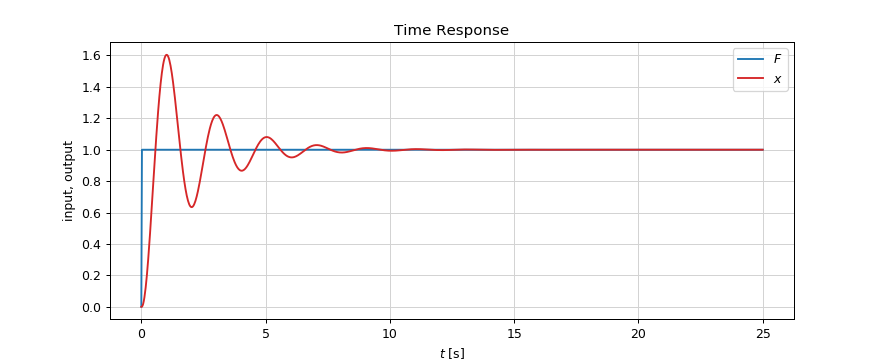

ToggleButtons(description='Select system: ', options=(('mass-spring-damper', 0), ('1/4 car model', 1)), style=…

ToggleButtons(description='Select $F$ function: ', options=(('step function', 0), ('impulse function', 1), ('r…

Output()

In [4]:
# create figure
fig = plt.figure(figsize=(9.8, 4),num='Mechanical systems')

# add sublot
ax = fig.add_subplot(111)
ax.set_title('Time Response')
ax.set_ylabel('input, output')
ax.set_xlabel('$t$ [s]')

ax.grid(which='both', axis='both', color='lightgray')

inputf, = ax.plot([], [])
responsef, = ax.plot([], [])
responsef2, = ax.plot([], [])
arrowf, = ax.plot([],[])

style = {'description_width': 'initial'}

selectSystem=widgets.ToggleButtons(
    options=[('mass-spring-damper',0),('1/4 car model',1)],
    description='Select system: ', style=style) # define toggle buttons
selectForce = widgets.ToggleButtons(
    options=[('step function', 0), ('impulse function', 1), ('ramp function', 2), ('sine function', 3)],
    description='Select $F$ function: ', style=style)
display(selectSystem)
display(selectForce)

def build_model(M,K,B,M1,M2,B1,K1,K2,amp,x0,xpika0,y0,ypika0,select_System,index):
    
    num_of_samples = 1000
    total_time = 25
    t = np.linspace(0, total_time, num_of_samples) # time for which response is calculated (start, stop, step)
    
    global inputf, responsef, responsef2, arrowf
    
    if select_System==0:
        
        system0 = control.TransferFunction([1], [M, B, K])
        
        if index==0:
            inputfunc = np.ones(len(t))*amp
            inputfunc[0]=0
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0]) 
        
        elif index==1:
            inputfunc=signal.unit_impulse(1000, 0)*amp
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0]) 
    
        elif index==2:
            inputfunc=t;
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0]) 
       
        elif index==3:
            inputfunc=np.sin(t)*amp
            time, response, xx = control.forced_response(system0, t, inputfunc, X0=[xpika0,x0])    
    
    elif select_System==1:
        
        system1=control.TransferFunction([M2, B1, K1+K2], [M1*M2, M1*B1+M2*B1, M2*K1+M1*(K1+K2), K2*B1, K1*K2])
        system2=control.TransferFunction([B1*K1*M2**2, B1**2*K1*M2, B1*K1**2*M2 + 2*B1*K1*K2*M2,
                                          B1**2*K1*K2, B1*K1**2*K2 + B1*K1*K2**2],
                                         [M1**2*M2**2, B1*M1**2*M2 + 2*B1*M1*M2**2, 
                                          B1**2*M1*M2 + B1**2*M2**2 + K1*M1**2*M2 + 2*K1*M1*M2**2 + 2*K2*M1**2*M2 + K2*M1*M2**2,
                                          2*B1*K1*M1*M2 + 2*B1*K1*M2**2 + B1*K2*M1**2 + 5*B1*K2*M1*M2 + B1*K2*M2**2,
                                          B1**2*K2*M1 + 2*B1**2*K2*M2 + K1**2*M1*M2 + K1**2*M2**2 + K1*K2*M1**2 + 5*K1*K2*M1*M2 + K1*K2*M2**2 + K2**2*M1**2 + 2*K2**2*M1*M2,
                                          2*B1*K1*K2*M1 + 4*B1*K1*K2*M2 + 3*B1*K2**2*M1 + 2*B1*K2**2*M2,
                                          B1**2*K2**2 + K1**2*K2*M1 + 2*K1**2*K2*M2 + 3*K1*K2**2*M1 + 2*K1*K2**2*M2 + K2**3*M1,
                                          2*B1*K1*K2**2 + B1*K2**3,
                                          K1**2*K2**2 + K1*K2**3])
        if index==0:
            inputfunc = np.ones(len(t))*amp
            inputfunc[0]=0        
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,xpika0,x0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0,0,0,ypika0,y0])
        
        elif index==1:
            inputfunc=signal.unit_impulse(1000, 0)*amp
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,xpika0,x0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0,0,0,ypika0,y0])
       
        elif index==2:
            inputfunc=t;
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,xpika0,x0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0,0,0,ypika0,y0])
        
        elif index==3:
            inputfunc=np.sin(t)*amp
            time, response, xx = control.forced_response(system1, t, inputfunc, X0=[0,0,xpika0,x0])
            time2, response2, xx2 = control.forced_response(system2, t, inputfunc, X0=[0,0,0,0,0,0,ypika0,y0])

    
    ax.lines.remove(responsef)
    ax.lines.remove(inputf)
    ax.lines.remove(responsef2)
    ax.lines.remove(arrowf)
    
    inputf, = ax.plot(t,inputfunc,label='$F$',color='C0')
    responsef, = ax.plot(time, response,label='$x$',color='C3')
    
    if select_System==1:
        responsef2, = ax.plot(time, response2,label='$y$',color='C2')
    elif select_System==0:
        responsef2, = ax.plot([],[])
        
    if index==1:
        if amp>0:
            arrowf, = ax.plot([-0.1,0,0.1],[amp-((amp*0.05)/2),amp,amp-((amp*0.05)/2)],color='C0',linewidth=4)
        elif amp==0:
            arrowf, = ax.plot([],[])
        elif amp<0:
            arrowf, = ax.plot([-0.1,0,0.1],[amp-((amp*0.05)/2),amp,amp-(amp*(0.05)/2)],color='C0',linewidth=4)
    else:
        arrowf, = ax.plot([],[])
    
    ax.relim()
    ax.autoscale_view()
    
    ax.legend()    
    
def update_sliders(index):
    global m1_slider, b1_slider, k1_slider, m21_slider, m22_slider, b2_slider, k21_slider, k22_slider
    global x0_slider, xpika0_slider, y0_slider, ypika0_slider

    m1val = [0.1,0.1,0.1,0.1]
    k1val = [1,1,1,1]
    b1val = [0.1,0.1,0.1,0.1]
    m21val = [0.1,0.1,0.1,0.1]
    m22val = [0.1,0.1,0.1,0.1]
    b2val = [0.1,0.1,0.1,0.1]
    k21val = [1,1,1,1]
    k22val = [1,1,1,1]
    x0val = [0,0,0,0]
    xpika0val = [0,0,0,0]
    y0val = [0,0,0,0]
    ypika0val = [0,0,0,0]
    
    m1_slider.value = m1val[index]
    k1_slider.value = k1val[index]
    b1_slider.value = b1val[index]
    m21_slider.value = m21val[index]
    m22_slider.value = m22val[index]
    b2_slider.value = b2val[index]
    k21_slider.value = k21val[index]
    k22_slider.value = k22val[index]
    x0_slider.value = x0val[index]
    xpika0_slider.value = xpika0val[index]
    y0_slider.value = y0val[index]
    ypika0_slider.value = ypika0val[index]  
    
def draw_controllers(type_select,index):
    
    global m1_slider, b1_slider, k1_slider, m21_slider, m22_slider, b2_slider, k21_slider, k22_slider
    global x0_slider, xpika0_slider, y0_slider, ypika0_slider
   
    
    x0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='$x_0$ [dm]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
    xpika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='${\dot{x}}_0$ [dm/s]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
    
    if type_select==0:
        
        amp_slider = widgets.FloatSlider(value=1.,min=-2.,max=2.,step=0.1,
            description='Input signal amplification:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',style=style)
            
        m1_slider = widgets.FloatSlider(value=.1, min=.01, max=1., step=.01,
                                        description='$m$ [kg]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        k1_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
                                       description='$k$ [N/m]:',disabled=False,continuous_update=False,
                                       orientation='horizontal',readout=True,readout_format='.1f',)
        b1_slider = widgets.FloatSlider(value=.1,min=0.0,max=0.5,step=.01,
                                        description='$B$ [Ns/m]:',disabled=False,continuous_update=False,
                                        rientation='horizontal',readout=True,readout_format='.2f',)
        m21_slider = widgets.FloatSlider(value=.1,min=.01,max=1.,step=.01,
            description='$m_1$ [kg]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        m22_slider = widgets.FloatSlider(value=.1,min=.0,max=1.,step=.01,
            description='$m_2$ [kg]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        b2_slider = widgets.FloatSlider(value=.1,min=0.0,max=2,step=.01,
            description='$B$ [Ns/m]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        k21_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_1$ [N/m]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        k22_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_2$ [N/m]:',disabled=True,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        
        y0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='$y_0$ [dm]:',disabled=True,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        ypika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='${\dot{y}}_0$ [dm/s]:',disabled=True,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
    elif type_select==1:
        
        amp_slider = widgets.FloatSlider(value=1.,min=-2.,max=2.,step=0.1,
            description='Input signal amplification:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',style=style)
            
        m1_slider = widgets.FloatSlider(value=.1, min=.01, max=1., step=.01,
                                        description='$m$ [kg]:',disabled=True,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        k1_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
                                       description='$k$ [N/m]:',disabled=True,continuous_update=False,
                                       orientation='horizontal',readout=True,readout_format='.1f',)
        b1_slider = widgets.FloatSlider(value=.1,min=0.0,max=0.5,step=.01,
                                        description='$B$ [Ns/m]:',disabled=True,continuous_update=False,
                                        rientation='horizontal',readout=True,readout_format='.2f',)
        m21_slider = widgets.FloatSlider(value=.1,min=.01,max=1.,step=.01,
            description='$m_1$ [kg]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        m22_slider = widgets.FloatSlider(value=.1,min=.0,max=1.,step=.01,
            description='$m_2$ [kg]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        b2_slider = widgets.FloatSlider(value=.1,min=0.0,max=2,step=.01,
            description='$B$ [Ns/m]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.2f',
        )
        k21_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_1$ [N/m]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        k22_slider = widgets.FloatSlider(value=1.,min=0.,max=20.,step=.1,
            description='$k_2$ [N/m]:',disabled=False,continuous_update=False,orientation='horizontal',readout=True,readout_format='.1f',
        )
        
        y0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='$y_0$ [dm]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)
        ypika0_slider=widgets.FloatSlider(value=0, min=-1, max=1., step=.1,
                                        description='${\dot{y}}_0$ [dm/s]:',disabled=False,continuous_update=False,
                                        orientation='horizontal',readout=True,readout_format='.2f',)    
    input_data = widgets.interactive_output(build_model, {'M':m1_slider, 'K':k1_slider, 'B':b1_slider, 'M1':m21_slider,
                                                    'M2':m22_slider, 'B1':b2_slider, 'K1':k21_slider, 'K2':k22_slider, 'amp':amp_slider,
                                                    'x0':x0_slider,'xpika0':xpika0_slider,'y0':y0_slider,'ypika0':ypika0_slider,      
                                                    'select_System':selectSystem,'index':selectForce})  
    
    input_data2 = widgets.interactive_output(update_sliders, {'index':selectForce})
  
    box_layout = widgets.Layout(border='1px solid black',
                    width='auto',
                    height='',
                    flex_flow='row',
                    display='flex')

    buttons1=widgets.HBox([widgets.VBox([amp_slider],layout=widgets.Layout(width='auto')),
                         widgets.VBox([x0_slider,xpika0_slider]),
                         widgets.VBox([y0_slider,ypika0_slider])],layout=box_layout)
    display(widgets.VBox([widgets.Label('Select the values of the input signal amplification and intial conditions:'), buttons1]))
    display(widgets.HBox([widgets.VBox([m1_slider,k1_slider,b1_slider], layout=widgets.Layout(width='45%')),
                          widgets.VBox([m21_slider,m22_slider,k21_slider,k22_slider,b2_slider], layout=widgets.Layout(width='45%'))]), input_data)
    
widgets.interactive_output(draw_controllers, {'type_select':selectSystem,'index':selectForce})